In [5]:
#Import libralies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [6]:
#Import dataset
df=pd.read_csv('Companies.csv')

In [7]:
#view top 5
df.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.tail()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [9]:
#Check data informatio/data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D_Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing_Spend    1000 non-null float64
State              1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [10]:
#Drop irrelevant columns
df.drop(['State'],axis=1,inplace=True)

In [11]:
df.shape

(1000, 4)

In [12]:
#Check for missing values
df.isnull().sum()

R&D_Spend          0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [13]:
df.describe()

,R&D_Spend,Administration,Marketing_Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


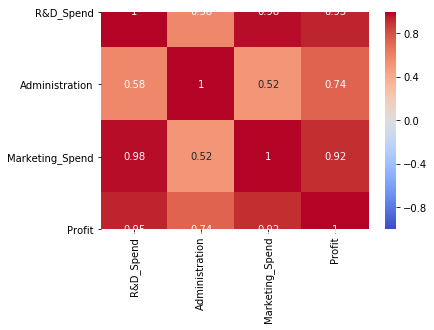

In [9]:
#Data visualizatin
#Building the correlation matrix
#the diagonal row at the center shows highest correlation.
#profit has a high correlation with R&D spending and less connection to marketing and administration.
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [15]:
#correlation table
df.corr()

,x1,x2,x3,y
x1,1.000000,0.582434,0.978407,0.945245
x2,0.582434,1.000000,0.520465,0.741560
x3,0.978407,0.520465,1.000000,0.917270
y,0.945245,0.741560,0.917270,1.000000


In [16]:
#Label columns
df.columns = ['x1', 'x2', 'x3', 
                'y'] 

In [17]:
#Separate independent(X) and dependent variables(y) var
X=df.drop(['y'],axis=1)
print(X)

            x1          x2           x3
0    165349.20  136897.800  471784.1000
1    162597.70  151377.590  443898.5300
2    153441.51  101145.550  407934.5400
3    144372.41  118671.850  383199.6200
4    142107.34   91391.770  366168.4200
..         ...         ...          ...
995   54135.00  118451.999  173232.6695
996  134970.00  130390.080  329204.0228
997  100275.47  241926.310  227142.8200
998  128456.23  321652.140  281692.3200
999  161181.72  270939.860  295442.1700

[1000 rows x 3 columns]


In [18]:
y=df.y
print(y)

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: y, Length: 1000, dtype: float64


In [20]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [172]:
#check for accuracy-use r2 for regression
classifier = LinearRegression()
scores= cross_val_score(classifier, X,y, cv=10, scoring='r2')
scores.mean()

-0.6732307473413239

In [173]:
#find the RMSE
(np.sqrt(-cross_val_score(classifier, X, y, cv=3, scoring='neg_mean_squared_error')).mean())

37933.51311175778

In [174]:
print(scores)

[-15.22867293   0.99982409   0.99987022   0.99982341   0.99986482
   0.9998472    0.99984929   0.99985191   0.99985941   0.49757511]


In [175]:
from sklearn.model_selection import train_test_split

In [176]:
#Splitting the data into training set and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [177]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [178]:

import statsmodels.api as sm
X2_train=sm.add_constant(X_train_scaled)
X2_test=sm.add_constant(X_test_scaled)
ols=sm.OLS(y_train,X_train)
lr=ols.fit()
lr.params

x1    0.773611
x2    0.445885
x3    0.006338
dtype: float64

In [179]:
#BEFORE FEATURE ELIMINATION
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          4.253e+04
Date:                Wed, 26 Feb 2020   Prob (F-statistic):                        0.00
Time:                        19:54:10   Log-Likelihood:                         -7383.4
No. Observations:                 700   AIC:                                  1.477e+04
Df Residuals:                     697   BIC:                                  1.479e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [180]:
#drop X3, p_value greater than alpha value(0.05)
while lr.pvalues.max()>0.05:
    X2_train=np.delete(X2_train,lr.pvalues.values.argmax(),axis=1)
    X2_test=np.delete(X2_test,lr.pvalues.values.argmax(),axis=1)
    ols=sm.OLS(y_train,X2_train)
    lr=ols.fit()

In [181]:
#After feature elimination
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     9725.
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:54:11   Log-Likelihood:                -7491.1
No. Observations:                 700   AIC:                         1.499e+04
Df Residuals:                     698   BIC:                         1.500e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.179e+05    406.894    289.868      0.0

In [182]:
#train & test the model
y_pred_train=lr.predict(X2_train)
y_pred_test=lr.predict(X2_test)

In [183]:
y_pred_train[0:5]

array([ 87390.82007523,  94624.40065505,  77354.73191899, 106023.49924251,
       126843.35466923])

In [184]:
y_pred_test[0:5]

array([ 84595.82608104,  83207.71943826,  89791.83508751, 172929.72633592,
        78812.77637983])

In [185]:
r2=r2_score(y_test,y_pred_test)

In [186]:
#Actual y less y predict squared shows a very good prediction 0f .80 and above accuracy.
#The trained model  is therefore successful
print(r2)

0.803156331690217


In [187]:
#adjusted R2
adjustedR2=1-(1-r2)*((len(X2_test)-1)/(len(X2_test)-len(X2_test[0])))
print(adjustedR2)

0.802495782467701


In [188]:
mean_squared_error(y_train,y_pred_train)

115562944.05302656

In [189]:
rss=((y_test-y_pred_test)**2).sum()
mse=np.mean((y_test-y_pred_test)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred_test)**2)))

Final rmse value is = 20229.524404116888


Text(0.5, 1.0, ' TRUE VALUES BASED ON\nPREDICTIONS')

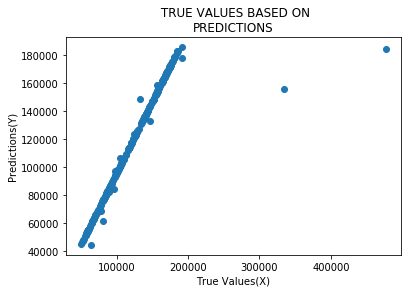

In [190]:
## The line / model
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values(X)')
plt.ylabel('Predictions(Y)')
plt.title(' TRUE VALUES BASED ON\nPREDICTIONS')

In [191]:
#check for accuracy-kfold
classifier = LinearRegression()
scores= cross_val_score(classifier, X_test,y_test, cv=3, scoring='r2')

In [192]:
print(scores)

[0.96422631 0.84462853 0.73644547]


In [193]:
scores.mean()

0.8484334365654426